# &nbsp; 1. Initiating

## &nbsp;1.1 Installing Libraries

In [1]:
# Install libraries
!pip install pandas numpy matplotlib seaborn scikit-learn gensim pyLDAvis sastrawi -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.2 MB/s eta 0:00:00


In [2]:
!pip install --upgrade nltk

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
!pip install spacy -q

## &nbsp;1.2 Import Libraries

In [36]:
# basic
import pandas as pd
import numpy as np
import spacy

# visualized
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# prep
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    # import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# modelling
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel

# save mdoel
import pickle

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## &nbsp;1.3 Connect to G-Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# &nbsp;2. Prepared the Data / EDA

## &nbsp;2.1 Load dataset

In [7]:
file_path = "/content/drive/MyDrive/Colab Notebooks/LDA for IKN/IKN.csv"
df = pd.read_csv(file_path)

In [8]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1828993551813996936,Thu Aug 29 23:57:32 +0000 2024,2,@Aryprasetyo85 Kalau cara-cara seperti ini yg ...,1829307426627289397,NaN,Aryprasetyo85,in,"Ciomas, Indonesia",0,0,1,https://x.com/mulyadiabdullah/status/182930742...,105077210,mulyadiabdullah
1,1829102996015460448,Thu Aug 29 23:51:45 +0000 2024,0,@Boediantar4 Ga tertarik lagi sma perkara d jk...,1829305974580236763,NaN,Boediantar4,in,NaN,0,0,0,https://x.com/ludvya_fiqry/status/182930597458...,1045714723088433152,ludvya_fiqry
2,1829070888047882256,Thu Aug 29 23:50:14 +0000 2024,0,@Masfkr @ludovicusdwi @ImaginarySteady @jokowi...,1829305590449143953,NaN,Masfkr,in,NaN,0,1,0,https://x.com/MahrezNabil2016/status/182930559...,1758433575194816512,MahrezNabil2016
3,1828993551813996936,Thu Aug 29 23:48:27 +0000 2024,2,@Aryprasetyo85 dan banyak cebong bangga dg ikn,1829305142610723146,NaN,Aryprasetyo85,in,"Depok, Indonesia",0,0,0,https://x.com/DpkWulan/status/1829305142610723146,1404211742540853248,DpkWulan
4,1829295018278093151,Thu Aug 29 23:47:43 +0000 2024,0,@Hansunriko IKN Nusantara🇮🇩,1829304959818731958,NaN,Hansunriko,in,NaN,0,0,0,https://x.com/Tatarori80/status/18293049598187...,1373275046970462214,Tatarori80


## &nbsp;2.2 Explore the dataset

In [9]:
df.shape

(1000, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1000 non-null   int64 
 1   created_at               1000 non-null   object
 2   favorite_count           1000 non-null   int64 
 3   full_text                1000 non-null   object
 4   id_str                   1000 non-null   int64 
 5   image_url                388 non-null    object
 6   in_reply_to_screen_name  493 non-null    object
 7   lang                     1000 non-null   object
 8   location                 488 non-null    object
 9   quote_count              1000 non-null   int64 
 10  reply_count              1000 non-null   int64 
 11  retweet_count            1000 non-null   int64 
 12  tweet_url                1000 non-null   object
 13  user_id_str              1000 non-null   int64 
 14  username                 1000 non-null   

In [11]:
duplicate_rows = df.duplicated()
print("Jumlah baris duplikat:", duplicate_rows.sum())

Jumlah baris duplikat: 0


In [12]:
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
image_url                  612
in_reply_to_screen_name    507
lang                         0
location                   512
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
username                     0
dtype: int64


In [13]:
dfIKN = df[['full_text']]

In [14]:
dfIKN.head()

,full_text
0,@Aryprasetyo85 Kalau cara-cara seperti ini yg ...
1,@Boediantar4 Ga tertarik lagi sma perkara d jk...
2,@Masfkr @ludovicusdwi @ImaginarySteady @jokowi...
3,@Aryprasetyo85 dan banyak cebong bangga dg ikn
4,@Hansunriko IKN Nusantara🇮🇩


In [15]:
dfIKN.shape

(1000, 1)

In [16]:
dfIKN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


# &nbsp; 3. Pre-Processing

## &nbsp; 3.1 Case Cleaning

In [17]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_tweet_special)

In [18]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dfIKN['full_text'] = dfIKN['full_text'].apply(remove_singl_char)

In [19]:
print('Case Cleaning Result : \n')
print(dfIKN['full_text'].head())

Case Cleaning Result : 

0    Kalau caracara seperti ini yg dipakai bisa jad...
1    Ga tertarik lagi sma perkara  jkarta gw lbih t...
2    Katanya kan Dateng aja ke IKN bang nanti juga ...
3                      dan banyak cebong bangga dg ikn
4                                        IKN Nusantara
Name: full_text, dtype: object


In [20]:
dfIKN.head()

,full_text
0,Kalau caracara seperti ini yg dipakai bisa jad...
1,Ga tertarik lagi sma perkara jkarta gw lbih t...
2,Katanya kan Dateng aja ke IKN bang nanti juga ...
3,dan banyak cebong bangga dg ikn
4,IKN Nusantara


## &nbsp; 3.2 Case Folding

In [21]:
dfIKN['full_text'] = dfIKN['full_text'].str.lower()

print('Case Folding Result : \n')
print(dfIKN['full_text'].head())

Case Folding Result : 

0    kalau caracara seperti ini yg dipakai bisa jad...
1    ga tertarik lagi sma perkara  jkarta gw lbih t...
2    katanya kan dateng aja ke ikn bang nanti juga ...
3                      dan banyak cebong bangga dg ikn
4                                        ikn nusantara
Name: full_text, dtype: object


In [22]:
dfIKN.head()

,full_text
0,kalau caracara seperti ini yg dipakai bisa jad...
1,ga tertarik lagi sma perkara jkarta gw lbih t...
2,katanya kan dateng aja ke ikn bang nanti juga ...
3,dan banyak cebong bangga dg ikn
4,ikn nusantara


## &nbsp; 3.3 Stopwords Removal

In [23]:
# Memuat daftar stopwords bahasa Indonesia dari NLTK
list_stopwords = stopwords.words('indonesian')

# Memuat stopwords tambahan dari file txt
with open('/content/drive/MyDrive/Colab Notebooks/LDA for IKN/stopwords_tambahan.txt', 'r',
          encoding='utf-8') as file:
    stopwords_tambahan = file.read().splitlines()

# Menambahkan stopwords tambahan ke daftar utama
list_stopwords.extend(stopwords_tambahan)

# Konversi ke set untuk optimasi pencarian
list_stopwords = set(list_stopwords)

# Fungsi untuk melakukan stopword removal
def stopwords_removal_direct(text):
    """
    Menghapus stopwords langsung dari teks.
    :param text: String teks
    :return: String teks tanpa stopwords
    """
    filtered_text = " ".join([word for word in text.split() if word not in list_stopwords])
    return filtered_text

# Menerapkan stopword removal pada kolom full_text
dfIKN['full_text_cleaned'] = dfIKN['full_text'].apply(stopwords_removal_direct)

# Menampilkan hasil
print('Stopword Removal Result: \n')
print(dfIKN[['full_text', 'full_text_cleaned']].head())

Stopword Removal Result: 

                                           full_text  \
0  kalau caracara seperti ini yg dipakai bisa jad...   
1  ga tertarik lagi sma perkara  jkarta gw lbih t...   
2  katanya kan dateng aja ke ikn bang nanti juga ...   
3                    dan banyak cebong bangga dg ikn   
4                                      ikn nusantara   

                                   full_text_cleaned  
0  caracara dipakai rakyat disana mendoakan ikn m...  
1  tertarik perkara jkarta lbih tertarik walikota...  
2  dateng ikn bang paham denger narasi isinya men...  
3                                  cebong bangga ikn  
4                                      ikn nusantara  


## &nbsp; 3.4 Normalization

In [24]:
# Membaca file normalization_dict.txt
normalization_dict = {}
with open('/content/drive/MyDrive/Colab Notebooks/LDA for IKN/normalization_dict.txt',
          'r', encoding='utf-8') as file:
    for line in file:
        key, value = line.strip().split(": ")
        normalization_dict[key] = value

# Fungsi untuk normalisasi teks
def normalize_text(text):
    """
    Mengganti kata-kata dalam teks berdasarkan normalization_dict.
    :param text: String teks
    :return: String teks setelah normalisasi
    """
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

# Menerapkan normalisasi pada kolom 'full_text_cleaned'
dfIKN['full_text_cleaned'] = dfIKN['full_text_cleaned'].apply(normalize_text)

# Menampilkan hasil
print('Normalization result:\n')
print(dfIKN[['full_text', 'full_text_cleaned']].head())

Normalization result:

                                           full_text  \
0  kalau caracara seperti ini yg dipakai bisa jad...   
1  ga tertarik lagi sma perkara  jkarta gw lbih t...   
2  katanya kan dateng aja ke ikn bang nanti juga ...   
3                    dan banyak cebong bangga dg ikn   
4                                      ikn nusantara   

                                   full_text_cleaned  
0  cara cara dipakai rakyat disana mendoakan ikn ...  
1  tertarik perkara jakarta lebih tertarik waliko...  
2  datang ikn bang paham dengar narasi isinya men...  
3                                  cebong bangga ikn  
4                                      ikn nusantara  


## &nbsp; 3.5 Stemming

In [25]:
# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming
def stemming_text(text):
    """
    Melakukan stemming pada teks menggunakan Sastrawi.
    :param text: String teks
    :return: String teks setelah stemming
    """
    return stemmer.stem(text)

# Menerapkan stemming pada kolom 'full_text_cleaned'
dfIKN['ft_stemmed'] = dfIKN['full_text_cleaned'].apply(stemming_text)

# Menampilkan hasil
print('Hasil Stemming:\n')
print(dfIKN[['full_text_cleaned', 'ft_stemmed']].head())

Hasil Stemming:

                                   full_text_cleaned  \
0  cara cara dipakai rakyat disana mendoakan ikn ...   
1  tertarik perkara jakarta lebih tertarik waliko...   
2  datang ikn bang paham dengar narasi isinya men...   
3                                  cebong bangga ikn   
4                                      ikn nusantara   

                                          ft_stemmed  
0       cara cara pakai rakyat sana doa ikn mangkrak  
1  tarik perkara jakarta lebih tarik walikota ikn...  
2  datang ikn bang paham dengar narasi isi jelek ...  
3                                  cebong bangga ikn  
4                                      ikn nusantara  


## &nbsp; 3.6 Tokenization

In [26]:
# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    """
    Melakukan tokenisasi pada teks.
    :param text: String teks
    :return: List token
    """
    return word_tokenize(text)

# Menerapkan tokenisasi pada kolom 'ft_stemmed'
dfIKN['ft_tokenized'] = dfIKN['ft_stemmed'].apply(tokenize_text)

# Menampilkan hasil
print('Hasil Tokenisasi:\n')
print(dfIKN[['ft_stemmed', 'ft_tokenized']].head())


Hasil Tokenisasi:

                                          ft_stemmed  \
0       cara cara pakai rakyat sana doa ikn mangkrak   
1  tarik perkara jakarta lebih tarik walikota ikn...   
2  datang ikn bang paham dengar narasi isi jelek ...   
3                                  cebong bangga ikn   
4                                      ikn nusantara   

                                        ft_tokenized  
0  [cara, cara, pakai, rakyat, sana, doa, ikn, ma...  
1  [tarik, perkara, jakarta, lebih, tarik, waliko...  
2  [datang, ikn, bang, paham, dengar, narasi, isi...  
3                              [cebong, bangga, ikn]  
4                                   [ikn, nusantara]  


## &nbsp; 3.7 Bag of Words (BoW)

In [27]:
# Membuat dictionary dari data tokenized
dictionary = corpora.Dictionary(dfIKN['ft_tokenized'])

# Konversi data ke format Bag of Words (BoW)
bow_corpus = [dictionary.doc2bow(text) for text in dfIKN['ft_tokenized']]

# Tampilkan contoh dictionary dan BoW
print("Dictionary:\n", dictionary.token2id)  # Menampilkan kata dan ID-nya
print("\nBoW Corpus Contoh:\n", bow_corpus[:2])  # Menampilkan dua contoh dokumen BoW

Dictionary:
 {'cara': 0, 'doa': 1, 'ikn': 2, 'mangkrak': 3, 'pakai': 4, 'rakyat': 5, 'sana': 6, 'jakarta': 7, 'lebih': 8, 'perkara': 9, 'tarik': 10, 'walikota': 11, 'yak': 12, 'apa': 13, 'bang': 14, 'benci': 15, 'datang': 16, 'deket': 17, 'dengar': 18, 'doktrin': 19, 'hal': 20, 'isi': 21, 'jelek': 22, 'kau': 23, 'lu': 24, 'narasi': 25, 'nerima': 26, 'nyata': 27, 'orang': 28, 'otak': 29, 'paham': 30, 'susah': 31, 'tetangga': 32, 'udah': 33, 'bangga': 34, 'cebong': 35, 'nusantara': 36, 'apbn': 37, 'butuh': 38, 'dipake': 39, 'doang': 40, 'duit': 41, 'gitu': 42, 'haaaaa': 43, 'joran': 44, 'kasih': 45, 'mati': 46, 'milu': 47, 'mulyono': 48, 'ngefek': 49, 'pandemi': 50, 'pas': 51, 'ratus': 52, 'ribu': 53, 'sayang': 54, 'suruh': 55, 'terima': 56, 'bandara': 57, 'hadir': 58, 'infrastruktur': 59, 'modern': 60, 'serius': 61, 'siap': 62, 'bangetdagang': 63, 'dagang': 64, 'dzolim': 65, 'gara': 66, 'goreng': 67, 'juta': 68, 'pajak': 69, 'perak': 70, 'proyek': 71, 'bales': 72, 'dm': 73, 'id': 74, 'i

# &nbsp; 4. Modelling

## &nbsp; 4.1 LDA with Gensim

In [28]:
# Menyusun model LDA
lda_model = LdaModel(bow_corpus,
                     num_topics=5,
                     id2word=dictionary,
                     passes=10,
                     alpha=0.5,
                     random_state=37
                     )

# Melihat topik yang ditemukan
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.086*"ikn" + 0.031*"bangun" + 0.013*"logistik" + 0.012*"indonesia" + 0.010*"infrastruktur"')
(1, '0.069*"ikn" + 0.016*"coba" + 0.016*"landas" + 0.015*"uji" + 0.012*"bandara"')
(2, '0.069*"ikn" + 0.010*"anies" + 0.009*"mulyono" + 0.009*"rakyat" + 0.008*"anjing"')
(3, '0.065*"ikn" + 0.027*"nusantara" + 0.025*"bangun" + 0.023*"beneran" + 0.022*"timur"')
(4, '0.056*"ikn" + 0.024*"pindah" + 0.011*"jokowi" + 0.011*"asn" + 0.010*"kantor"')


## &nbsp; 4.2 Coherence Score

In [29]:
# Menghitung coherence score
coherence_model = CoherenceModel(
    model=lda_model,  # Gunakan model LDA yang telah dibuat
    texts=dfIKN['ft_tokenized'],  # Teks yang telah ditokenisasi
    dictionary=dictionary,  # Dictionary yang digunakan untuk LDA
    coherence='c_v'  # Metode coherence score
)

# Mendapatkan nilai coherence
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.4f}")

Coherence Score: 0.4372


   Num Topics  Coherence Score
0           2         0.355018
1           3         0.358320
2           4         0.406753
3           5         0.437237


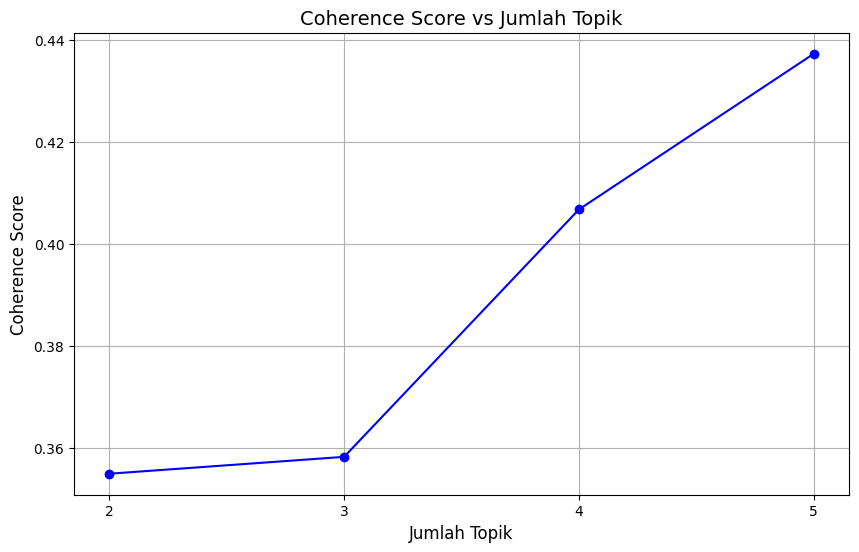

In [30]:
# Menyimpan hasil coherence score
coherence_scores = []
# Menguji jumlah topik dari 2 hingga 10
for num_topics in range(2, 6):
    lda_model = LdaModel(
        bow_corpus,
        num_topics=num_topics,
        id2word=dictionary,
        passes=10,
        alpha=0.5,
        random_state=37
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=dfIKN['ft_tokenized'],
        dictionary=dictionary,
        coherence='c_v'
    )
    score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, score))

# Membuat DataFrame dari hasil untuk tabel
coherence_df = pd.DataFrame(coherence_scores, columns=['Num Topics', 'Coherence Score'])
# Menampilkan tabel hasil
print(coherence_df)
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(coherence_df['Num Topics'], coherence_df['Coherence Score'], marker='o', linestyle='-', color='b')
plt.title('Coherence Score vs Jumlah Topik', fontsize=14)
plt.xlabel('Jumlah Topik', fontsize=12)
plt.ylabel('Coherence Score', fontsize=12)
plt.xticks(coherence_df['Num Topics'])
plt.grid()
plt.show()

# &nbsp; 5. Deployment

## &nbsp; 5.1 Wordcloud

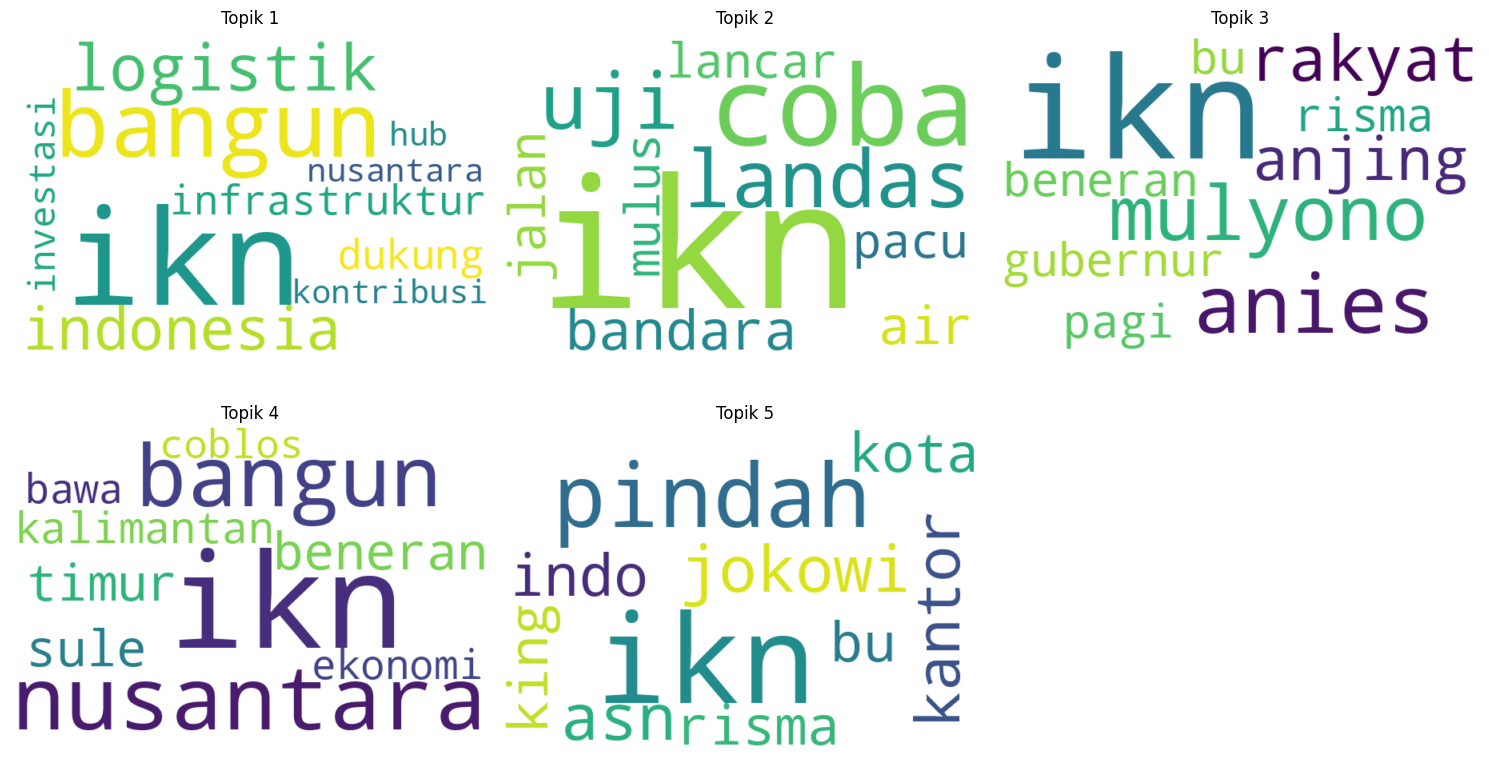

In [31]:
# Menyiapkan data untuk WordCloud
topics = lda_model.print_topics(num_words=10)

# Membuat plot untuk setiap topik
plt.figure(figsize=(15, 12))
for i, topic in enumerate(topics):
    plt.subplot(3, 3, i+1)  # Menyusun plot dalam grid 3x3
    words = topic[1]  # Ambil kata-kata dalam topik
    # Pisahkan kata dan frekuensinya
    word_freq = {word.split('*')[1].strip().strip('"'): float(word.split('*')[0]) for word in words.split(' + ')}

    # Membuat WordCloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Menampilkan WordCloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

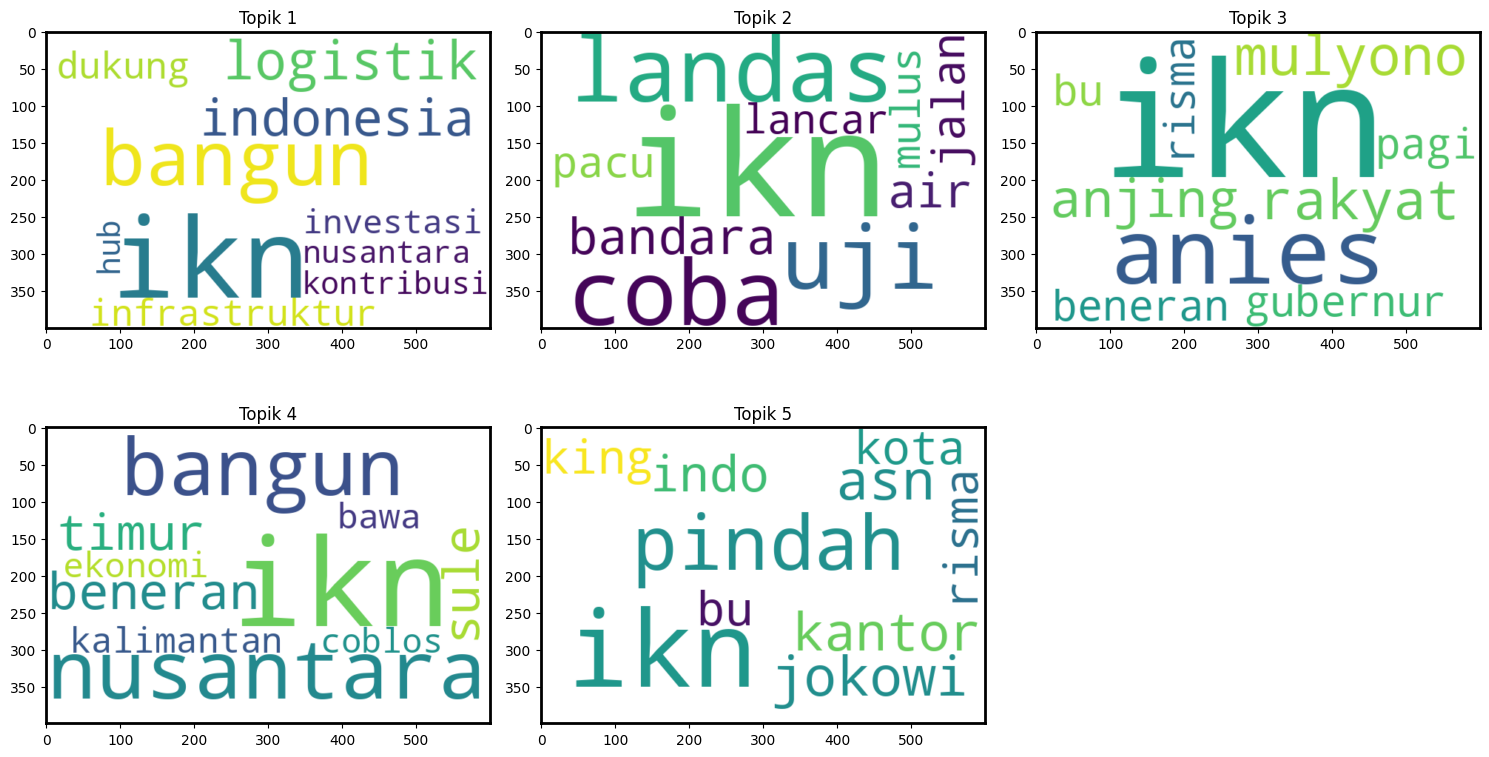

In [32]:
# Menyiapkan data untuk WordCloud
topics = lda_model.print_topics(num_words=10)

# Membuat plot untuk setiap topik
plt.figure(figsize=(15, 12))
for i, topic in enumerate(topics):
    ax = plt.subplot(3, 3, i+1)  # Menyusun plot dalam grid 3x3
    words = topic[1]  # Ambil kata-kata dalam topik

    # Pisahkan kata dan frekuensinya
    word_freq = {word.split('*')[1].strip().strip('"'): float(word.split('*')[0]) for word in words.split(' + ')}

    # Membuat WordCloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Menampilkan WordCloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topik {i+1}')
    ax.axis('on')

    # Menambahkan border untuk tiap plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Warna border hitam
        spine.set_linewidth(2)        # Lebar garis border

plt.tight_layout()
plt.show()

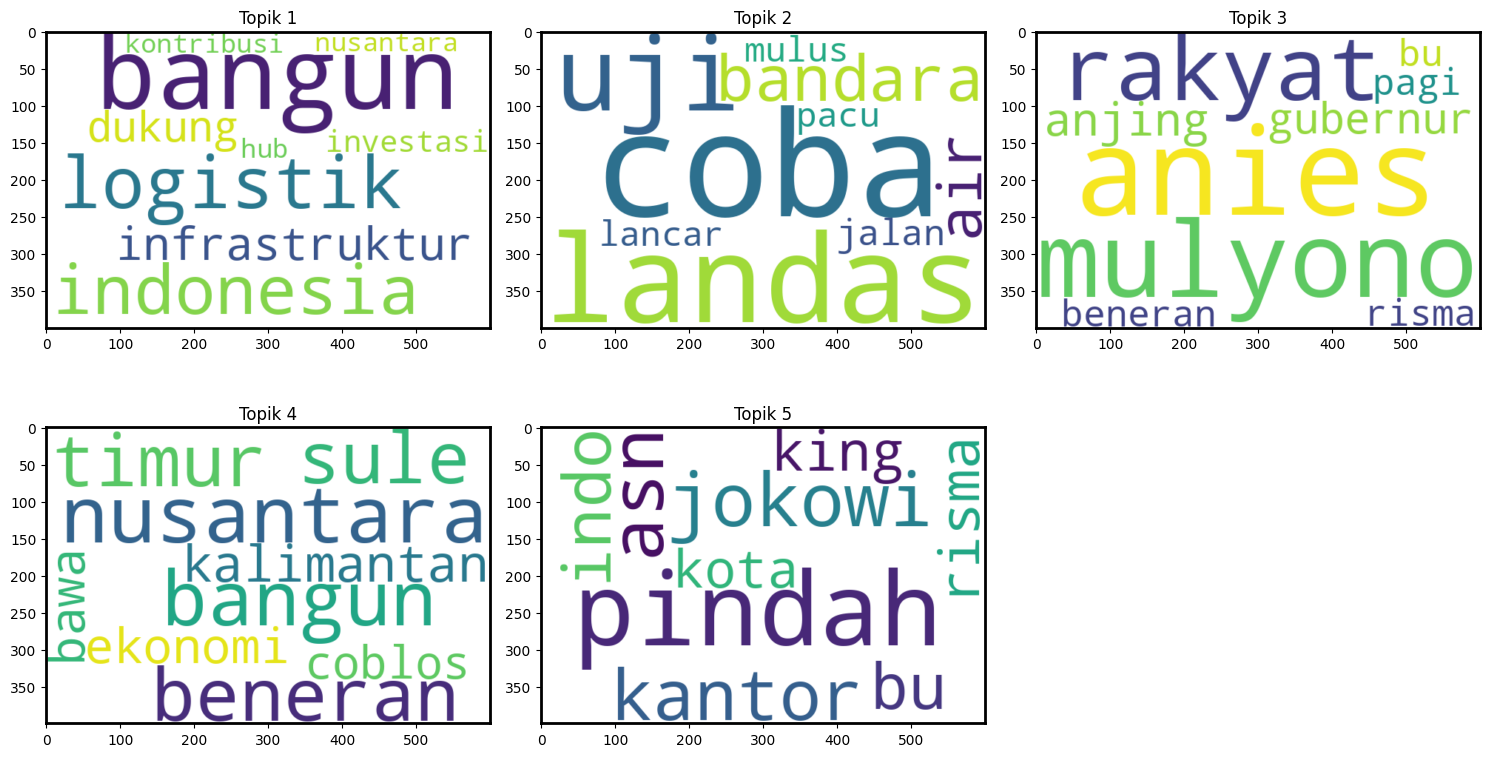

In [33]:
topics = lda_model.print_topics(num_words=10)

# Membuat plot untuk setiap topik
plt.figure(figsize=(15, 12))
for i, topic in enumerate(topics):
    ax = plt.subplot(3, 3, i+1)  # Menyusun plot dalam grid 3x3
    words = topic[1]  # Ambil kata-kata dalam topik

    # Pisahkan kata dan frekuensinya, sambil menyembunyikan kata 'ikn'
    word_freq = {word.split('*')[1].strip().strip('"'): float(word.split('*')[0]) for word in words.split(' + ') if 'ikn' not in word}

    # Membuat WordCloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Menampilkan WordCloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topik {i+1}')
    ax.axis('on')

    # Menambahkan border untuk tiap plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Warna border hitam
        spine.set_linewidth(2)        # Lebar garis border

plt.tight_layout()
plt.show()

In [34]:
# Menyusun model LDA
lda_model = LdaModel(bow_corpus,
                     num_topics=5,
                     id2word=dictionary,
                     passes=10,
                     alpha=0.5,
                     random_state=37
                     )

# Melihat topik yang ditemukan
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.086*"ikn" + 0.031*"bangun" + 0.013*"logistik" + 0.012*"indonesia" + 0.010*"infrastruktur" + 0.010*"dukung" + 0.008*"investasi" + 0.007*"kontribusi" + 0.007*"nusantara" + 0.007*"hub"')
(1, '0.069*"ikn" + 0.016*"coba" + 0.016*"landas" + 0.015*"uji" + 0.012*"bandara" + 0.011*"air" + 0.010*"jalan" + 0.009*"pacu" + 0.009*"lancar" + 0.009*"mulus"')
(2, '0.069*"ikn" + 0.010*"anies" + 0.009*"mulyono" + 0.009*"rakyat" + 0.008*"anjing" + 0.007*"gubernur" + 0.007*"beneran" + 0.007*"bu" + 0.007*"pagi" + 0.007*"risma"')
(3, '0.065*"ikn" + 0.027*"nusantara" + 0.025*"bangun" + 0.023*"beneran" + 0.022*"timur" + 0.022*"sule" + 0.022*"kalimantan" + 0.021*"ekonomi" + 0.021*"bawa" + 0.020*"coblos"')
(4, '0.056*"ikn" + 0.024*"pindah" + 0.011*"jokowi" + 0.011*"asn" + 0.010*"kantor" + 0.009*"indo" + 0.008*"bu" + 0.008*"king" + 0.008*"risma" + 0.008*"kota"')


## &nbsp; 5.2 pyLDAvis

In [35]:
# Menyiapkan data untuk visualisasi
lda_vis_data = gensimvis.prepare(
    lda_model,
    bow_corpus,
    dictionary,
    sort_topics=False  # Memastikan urutan topik sesuai dengan model LDA
)

# Menampilkan visualisasi
pyLDAvis.display(lda_vis_data)

# &nbsp; 6. Save Model

In [38]:
filename = 'ikn_model.sav'
pickle.dump(lda_model, open(filename, 'wb'))

In [39]:
# loading the saved model
loaded_model = pickle.load(open('ikn_model.sav', 'rb'))

In [40]:
# Path untuk menyimpan model di Google Drive
filename = "/content/drive/MyDrive/Colab Notebooks/LDA for IKN/ikn_model.sav"

# Simpan model
pickle.dump(lda_model, open(filename, 'wb'))
print("Model berhasil disimpan di Google Drive.")

Model berhasil disimpan di Google Drive.


load model from GDrive

In [41]:
# # Path ke file yang telah disimpan
# filename = "/content/drive/MyDrive/Colab Notebooks/LDA for IKN/ikn_model.sav"

# # Load model
# loaded_model = pickle.load(open(filename, 'rb'))
# print("Model berhasil dimuat kembali.")